# Bike Sharing 

## Citation 

**Boom** **Bikes**

Dataset link : https://www.kaggle.com/datasets/yasserh/bike-sharing-dataset


In [486]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [487]:
# warnings 
import warnings 
warnings.filterwarnings("ignore")

## 1. Data Understanding & Exploration 

In [488]:
# Loading Dataset 
df = pd.read_csv("/kaggle/input/bike-sharing-dataset/day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [489]:
# Shape 
df.shape

(730, 16)

In [490]:
# Columns in dataset 
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [491]:
# Info
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 133.4 KB


In [492]:
# Statistical Summary 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [493]:
# Null Value Analysis 

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [494]:
# Converting " dteday " object ---> datetime
df["dteday"] = df["dteday"].astype("datetime64[ns]")

In [495]:
# Decoding "season"

# 1 - Spring
# 2 - Summer 
# 3 - Fall 
# 4 - Winter 

df["season"] = df["season"].map({
    1:"spring", 
    2:"summer",
    3:"fall",
    4:"winter"
})


In [496]:
df["season"].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [497]:
# 0 - 2018  , 1 - 2019 -- Year
df["yr"].value_counts() , df["mnth"].value_counts()

(yr
 0    365
 1    365
 Name: count, dtype: int64,
 mnth
 1     62
 3     62
 5     62
 7     62
 8     62
 10    62
 12    62
 4     60
 6     60
 9     60
 11    60
 2     56
 Name: count, dtype: int64)

In [498]:
# Decoding months 
df["mnth"] = df["mnth"].map({
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"Jun",
    7:"Jul",
    8:"Aug",
    9:"Sept",
    10:"Oct",
    11:"Nov",
    12:"Dec"
})

In [499]:
df["mnth"].value_counts()

mnth
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64

In [500]:
# Holidays 
df["holiday"].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [501]:
# Week Day 
df["weekday"] = df["weekday"].map({
    0:"Mon",
    1:"Tue",
    2:"Wed",
    3:"Thurs",
    4:"Fri",
    5:"Sat",
    6:"Sun"
})

In [502]:
df["weekday"].value_counts()

weekday
Sun      105
Mon      105
Tue      105
Wed      104
Fri      104
Sat      104
Thurs    103
Name: count, dtype: int64

In [503]:
# Working Day
# df["workingday"].astype("category").value_counts()
df["workingday"].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [504]:
# weathersit

# 1 - Clear , Few Clouds , Partly Cloudy 
# 2 - Mist , Cloudy 
# 3 - Light Snow , Heavy Rain 

df["weathersit"] = df["weathersit"].map({
    1:"A", 
    2:"B",
    3:"C"
})



In [505]:
df["weathersit"].value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## 2. Data Visualization 

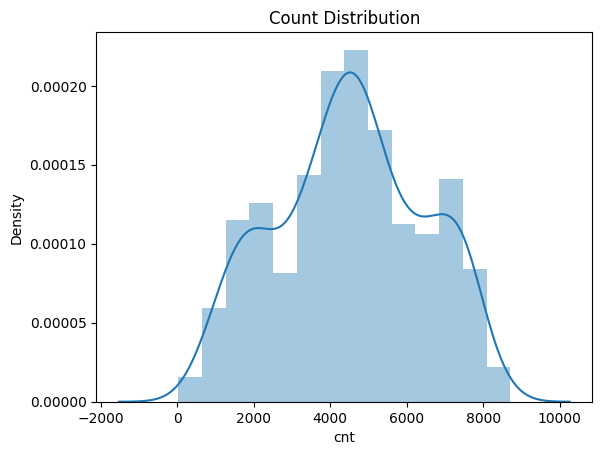

In [507]:
# Target variable analysis 
sns.distplot(df["cnt"])
plt.title("Count Distribution")
plt.show()

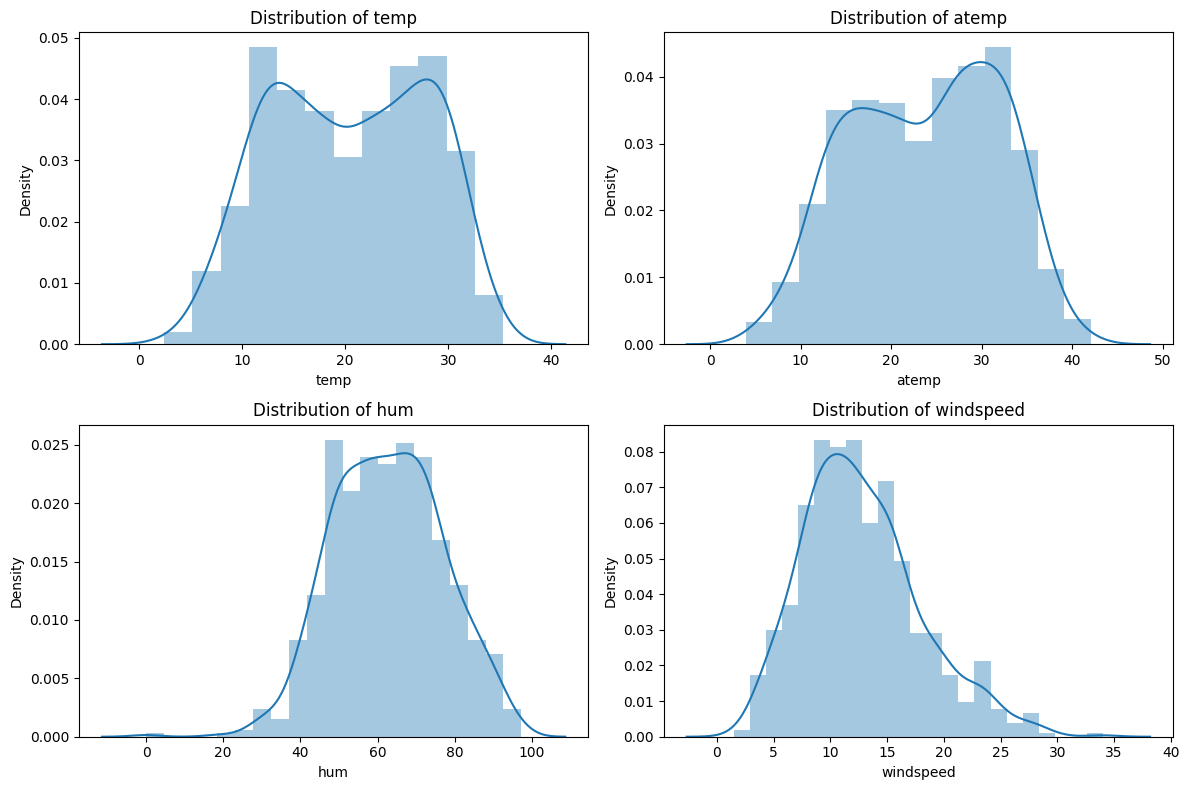

In [508]:
# Distribution of Temp , atemp , hum , windspeed
plt.figure(figsize = (12 , 8 ) )
for i , col in enumerate(["temp" , "atemp" , "hum" , "windspeed"] , 1): 
    plt.subplot(2 , 2 , i)
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [509]:
categorical_df =['season', 'mnth', 'weekday', 'weathersit' , 
                 'workingday' , 'yr' , 'holiday']


categorical_df

['season', 'mnth', 'weekday', 'weathersit', 'workingday', 'yr', 'holiday']

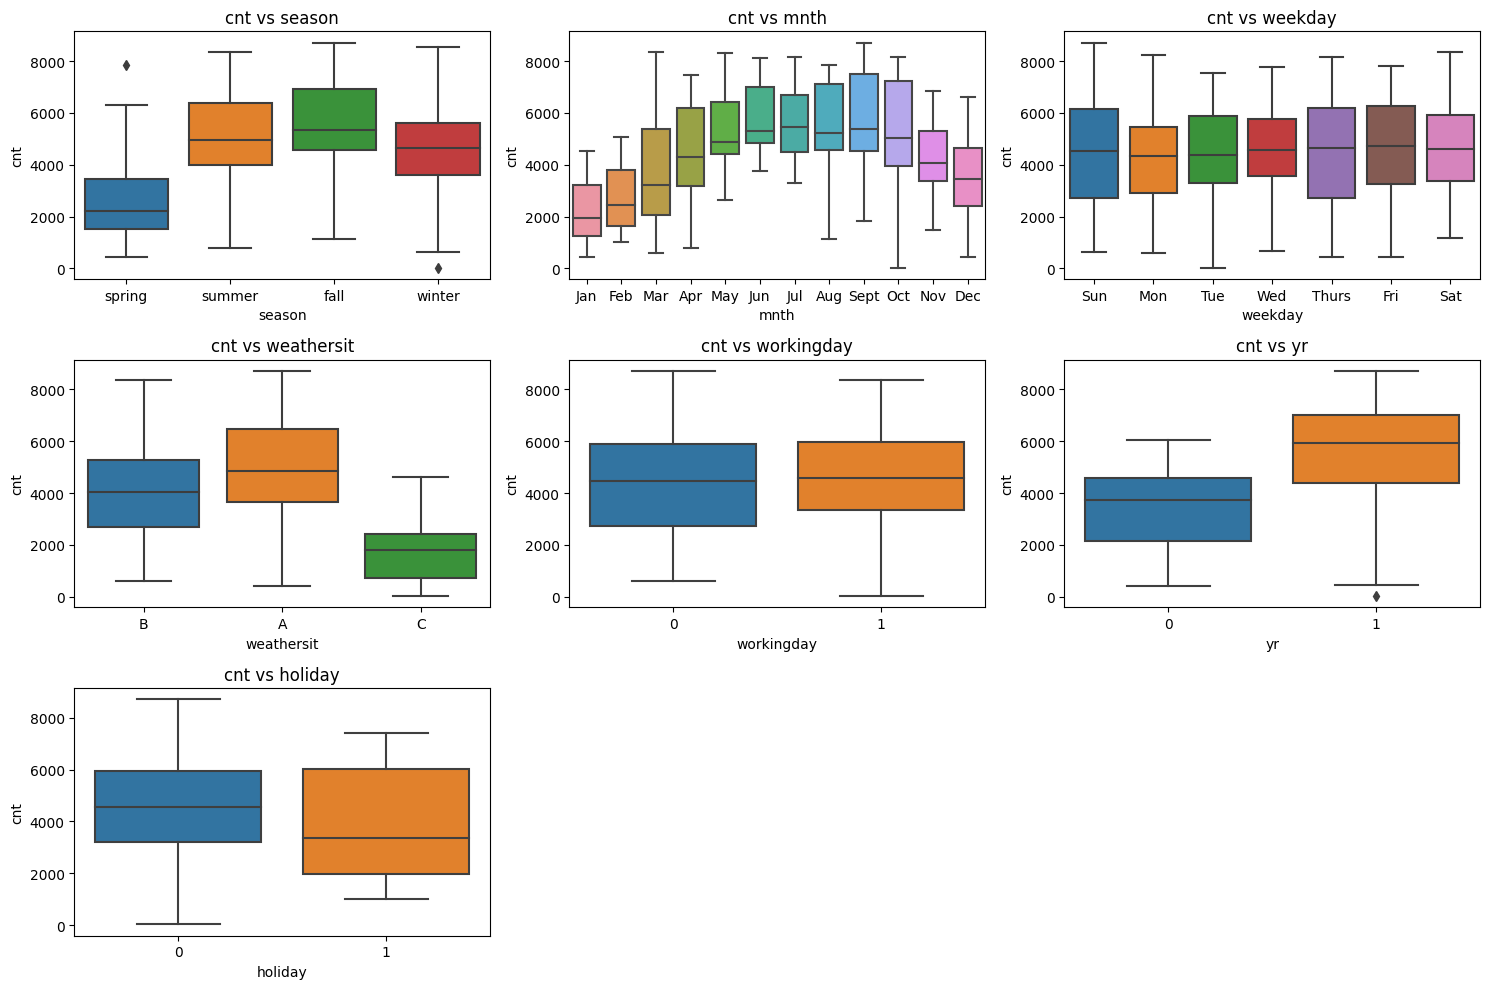

In [510]:
# Bivariate Analysis with target variable 
plt.figure(figsize = (15, 10 ))
for i , col in enumerate(categorical_df , 1 ):
    plt.subplot(3 , 3 , i)
    sns.boxplot(x = col , y = "cnt" , data = df)
    plt.title(f"cnt vs {col}")
plt.tight_layout()
plt.show()

In [511]:
# changing in for correlation 
for col in ["casual" , "registered" , "cnt"]:
    df[col] = df[col].astype("float64")

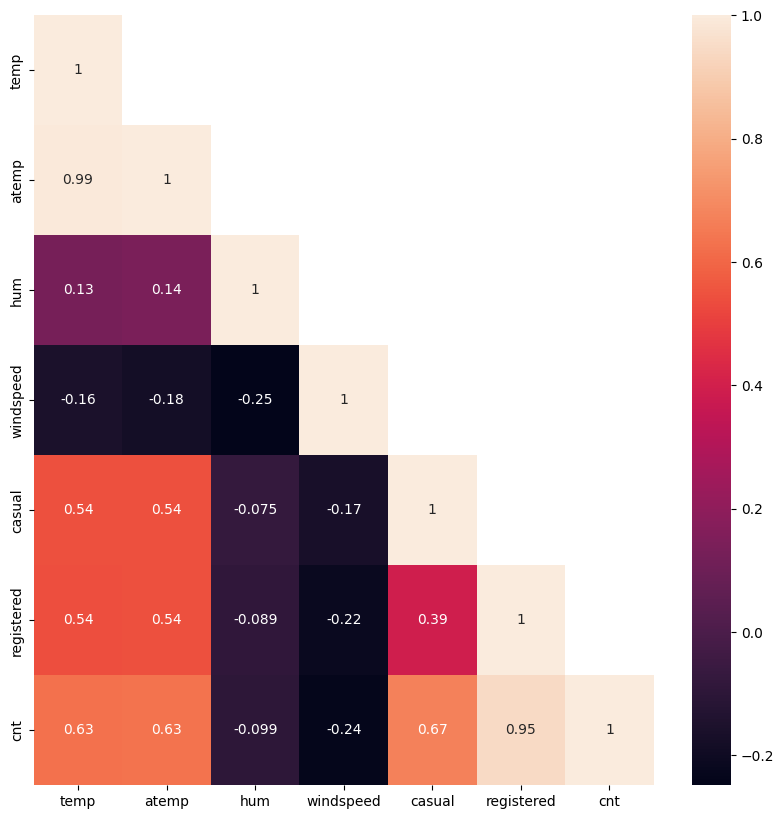

In [512]:
# correlation matrix 
corr = df.select_dtypes(include= ["float64"]).corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False 
plt.figure(figsize = (10 , 10 ))
sns.heatmap( corr ,mask = mask , annot  = True, vmax = 1)
plt.show()

## 3. Data Preparation 

In [513]:
# dropping features
df.drop(columns = ["instant" , "atemp" , "dteday"] , inplace = True )

In [514]:
category =  ["season" , "mnth" , "weekday" , "weathersit"]
for col in category:
    df[col] = df[col].astype("category")
    
categorical_data = df.select_dtypes(include=["category"])

In [515]:
# One-Hot encoding
dummy_df = pd.get_dummies(categorical_data , drop_first = True)

dummy_df = (dummy_df == True).astype(int)

In [516]:
df = df.drop(category , axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [517]:
df = pd.concat([df , dummy_df] , axis = 1)


In [518]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,1,0,0,0,0


## Model Building and Evaluation 

In [519]:
# Libs 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [520]:
# Spliting Data 
from sklearn.model_selection import train_test_split 

df_train , df_test = train_test_split(df , train_size= 0.7 , test_size = 0.3 , random_state = 100)


In [521]:
# Normalizing 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [522]:
var  = ["temp" , "hum" , "windspeed" , "casual" , "registered"]
df_train[var] = scaler.fit_transform(df_train[var])

In [523]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,4486.382353,0.243137,...,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,1952.158739,0.429398,...,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,3120.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,4530.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,5973.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


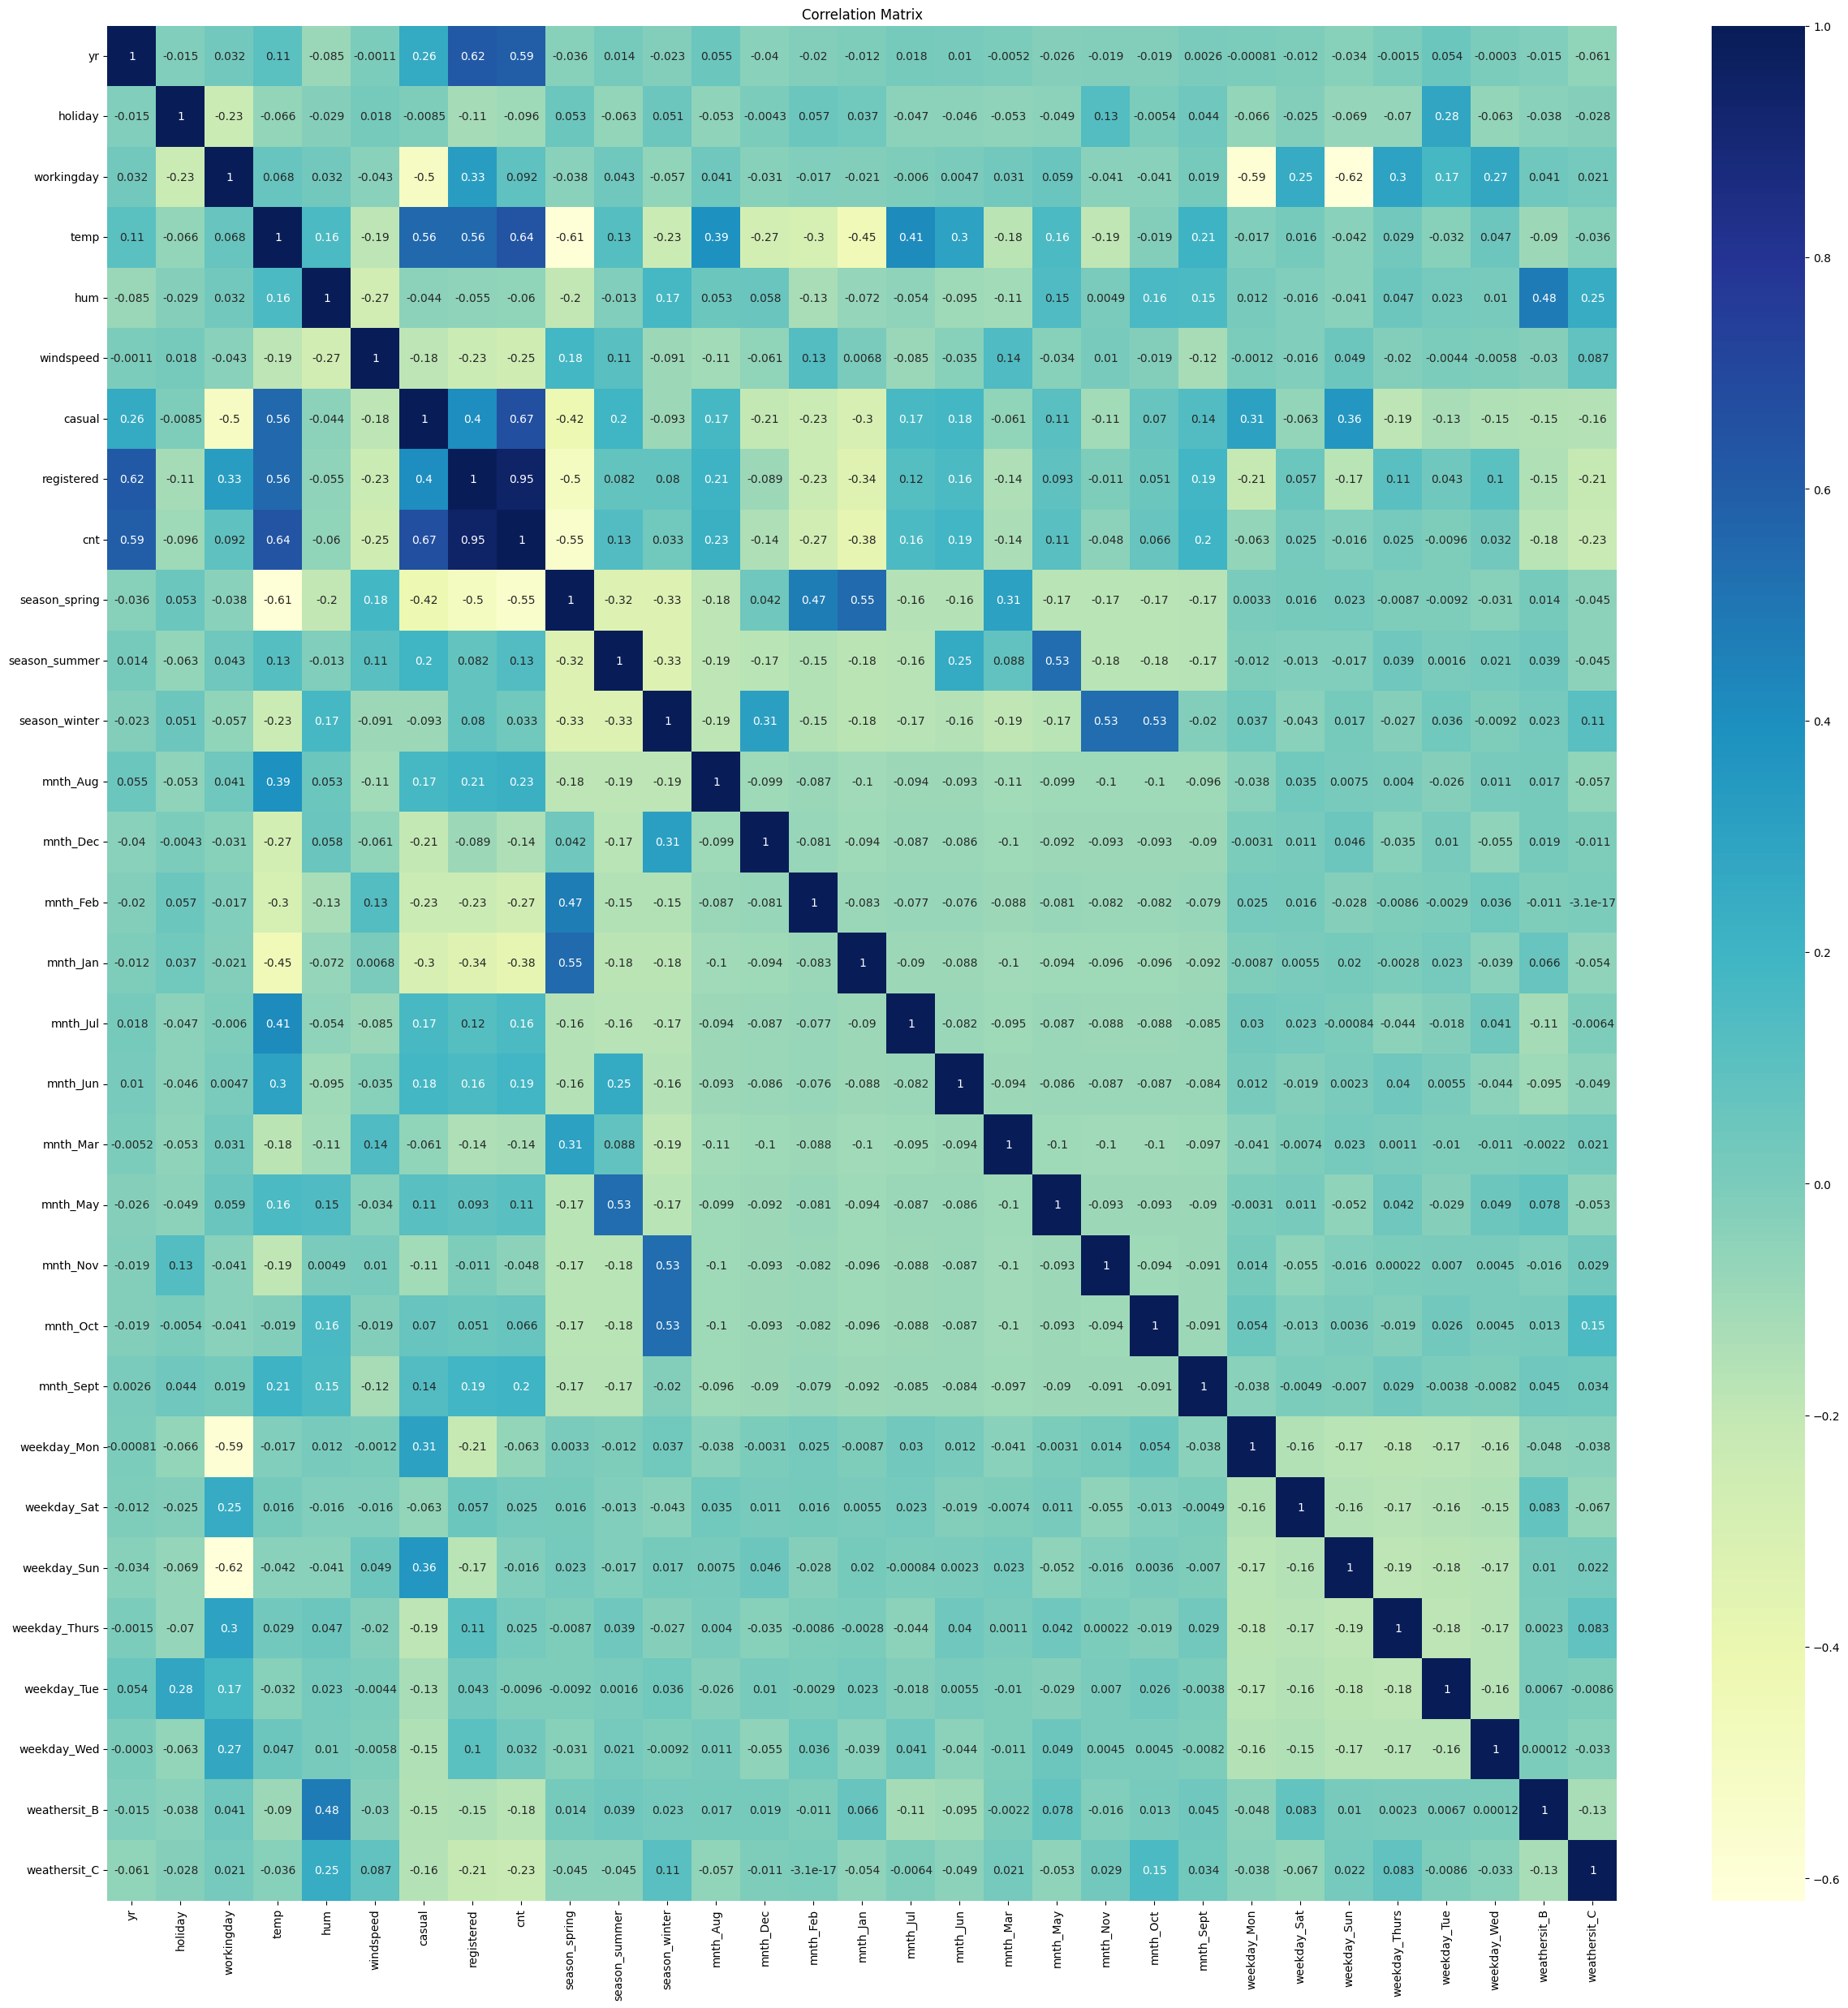

In [524]:
plt.figure(figsize = (30 , 30))
sns.heatmap(df_train.corr() , annot = True , cmap = "YlGnBu")
plt.title("Correlation Matrix")
plt.show()

In [525]:
#  X and y
X_train = df_train.drop(columns = ["casual" , "registered"])
y_train = df_train["cnt"]

In [526]:
X_train.shape , y_train.shape

((510, 29), (510,))

In [527]:
# Statistical Model 
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train , X_train_lm).fit()

In [528]:
lr.params

const            1.364242e-12
yr              -2.643219e-12
holiday          6.252776e-13
workingday       3.410605e-13
temp            -3.524292e-12
hum             -3.410605e-13
windspeed       -5.115908e-13
cnt              1.000000e+00
season_spring    3.410605e-13
season_summer    2.273737e-13
season_winter   -1.136868e-13
mnth_Aug         1.023182e-12
mnth_Dec        -2.273737e-13
mnth_Feb         5.684342e-13
mnth_Jan        -7.958079e-13
mnth_Jul         3.410605e-13
mnth_Jun         5.115908e-13
mnth_Mar         1.989520e-13
mnth_May        -3.410605e-13
mnth_Nov         4.547474e-13
mnth_Oct         1.932676e-12
mnth_Sept        5.684342e-13
weekday_Mon     -5.684342e-14
weekday_Sat      4.263256e-13
weekday_Sun      1.193712e-12
weekday_Thurs   -2.842171e-14
weekday_Tue      9.947598e-14
weekday_Wed      0.000000e+00
weathersit_B    -1.676881e-12
weathersit_C    -2.046363e-12
dtype: float64

In [529]:
# Linear Regression
Lir = LinearRegression()
Lir.fit(X_train , y_train)

LinearRegression()

In [530]:
print("Coef:",Lir.coef_)

print("Intercept:" , Lir.intercept_)

Coef: [ 1.41598604e-12 -3.58157948e-13  1.10776399e-13  2.94881496e-12
 -1.34432162e-12 -1.11918632e-12  1.00000000e+00  6.09033472e-13
 -6.26354741e-13  2.92260057e-13  3.33973327e-13  2.16323535e-13
  1.57628013e-13  3.42656658e-13 -2.47831256e-13 -1.74046111e-13
 -1.27324141e-13 -3.59759744e-13  2.82520560e-13  5.69408285e-14
  1.01634095e-13  1.14628071e-13 -5.15837085e-14  1.33333452e-13
 -2.21379768e-14  1.84756829e-13 -7.47279915e-14 -4.84194305e-13
  9.39152354e-15]
Intercept: 9.094947017729282e-13


In [531]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.450e+31
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:05:21   Log-Likelihood:                 13118.
No. Observations:                 510   AIC:                        -2.618e+04
Df Residuals:                     481   BIC:                        -2.606e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.364e-12   7.04e-13      1.937      0.053   -1.96e-14    2.75e-12
yr            -2.643e-12   2.53e-13    -10.454      0.000   -3.14e-12   -2.15e-12
holiday        6.253e-13   4.55e-13      1.373      0.170   -2.69e-13    1.52e-12
workingday     3.411e-13   2.48e-13      1.375      0.170   -1.46e-13    8.29e-13
temp          -3.524e-12   9.63e-13     -3.659      0.000   -5.42e-12   -1.63e-12
hum           -3.411e-13   7.44e-13     -0.459      0.647    -1.8e-12    1.12e-12
windspeed     -5.116e-13   5.15e-13     -0.994      0.321   -1.52e-12       5e-13
cnt               1.0000   9.97e-17      1e+16      0.000       1.000       1.000
season_spring  3.411e-13   5.72e-13      0.597      0.551   -7.82e-13    1.46e-12
season_summer  2.274e-13      5e-13      0.455      0.649   -7.54e-13    1.21e-12
season_winter -1.137e-13   5.39e-13     -0.211      0.833   -1.17e-12    9.45e-13
mnth_Aug       1.023e-12   6.41e-13      1.597      0.111   -2.36e-13    2.28e-12
mnth_Dec      -2.274e-13    6.4e-13     -0.355      0.723   -1.48e-12    1.03e-12
mnth_Feb       5.684e-13   6.26e-13      0.908      0.364   -6.62e-13     1.8e-12
mnth_Jan      -7.958e-13    6.4e-13     -1.243      0.214   -2.05e-12    4.62e-13
mnth_Jul       3.411e-13   6.68e-13      0.511      0.610   -9.71e-13    1.65e-12
mnth_Jun       5.116e-13   4.77e-13      1.072      0.284   -4.26e-13    1.45e-12
mnth_Mar        1.99e-13   4.67e-13      0.426      0.670   -7.18e-13    1.12e-12
mnth_May      -3.411e-13      4e-13     -0.853      0.394   -1.13e-12    4.45e-13
mnth_Nov       4.547e-13   6.92e-13      0.657      0.512   -9.06e-13    1.82e-12
mnth_Oct       1.933e-12   6.81e-13      2.839      0.005    5.95e-13    3.27e-12
mnth_Sept      5.684e-13   6.13e-13      0.928      0.354   -6.36e-13    1.77e-12
weekday_Mon   -5.684e-14   2.66e-13     -0.214      0.831   -5.79e-13    4.65e-13
weekday_Sat    4.263e-13   2.95e-13      1.444      0.149   -1.54e-13    1.01e-12
weekday_Sun    1.194e-12   2.73e-13      4.377      0.000    6.58e-13    1.73e-12
weekday_Thurs -2.842e-14   2.79e-13     -0.102      0.919   -5.76e-13    5.19e-13
weekday_Tue    9.948e-14   2.88e-13      0.346      0.730   -4.65e-13    6.64e-13
weekday_Wed            0   2.93e-13          0      1.000   -5.76e-13    5.76e-13
weathersit_B  -1.677e-12   2.05e-13     -8.164      0.000   -2.08e-12   -1.27e-12
weathersit_C  -2.046e-12   5.48e-13     -3.732      0.000   -3.12e-12   -9.69e-13
==============================================================================
Omnibus:                        2.006   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.772
Skew:                           0.022   Prob(JB):                        0.412
Kurtosis:                       2.715   Cond. No.            